# NSL_KDD dataset

# libraries import

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import normalize, minmax_scale
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# DATA IMPORTATION

In [2]:
#importing the dataset
train=pd.read_csv('data/KDDTrain+.txt')
train.head(10)






,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [3]:
#importing the dataset
test=pd.read_csv('data/KDDTest+.txt')
test.head(50)

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
5,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
6,0,tcp,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
7,0,tcp,http,SF,327,467,0,0,0,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
8,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7
9,0,tcp,telnet,SF,0,0,0,0,0,0,...,0.50,0.01,0.00,0.00,0.00,0.00,0.66,0.32,mscan,9


## Analysing Data


In [4]:
train.dtypes

0             int64
tcp          object
ftp_data     object
SF           object
491           int64
0.1           int64
0.2           int64
0.3           int64
0.4           int64
0.5           int64
0.6           int64
0.7           int64
0.8           int64
0.9           int64
0.10          int64
0.11          int64
0.12          int64
0.13          int64
0.14          int64
0.15          int64
0.16          int64
0.18          int64
2             int64
2.1           int64
0.00        float64
0.00.1      float64
0.00.2      float64
0.00.3      float64
1.00        float64
0.00.4      float64
0.00.5      float64
150           int64
25            int64
0.17        float64
0.03        float64
0.17.1      float64
0.00.6      float64
0.00.7      float64
0.00.8      float64
0.05        float64
0.00.9      float64
normal       object
20            int64
dtype: object

In [5]:
test.dtypes

0            int64
tcp         object
private     object
REJ         object
0.1          int64
0.2          int64
0.3          int64
0.4          int64
0.5          int64
0.6          int64
0.7          int64
0.8          int64
0.9          int64
0.10         int64
0.11         int64
0.12         int64
0.13         int64
0.14         int64
0.15         int64
0.16         int64
0.17         int64
0.18         int64
229          int64
10           int64
0.00       float64
0.00.1     float64
1.00       float64
1.00.1     float64
0.04       float64
0.06       float64
0.00.2     float64
255          int64
10.1         int64
0.04.1     float64
0.06.1     float64
0.00.3     float64
0.00.4     float64
0.00.5     float64
0.00.6     float64
1.00.2     float64
1.00.3     float64
neptune     object
21           int64
dtype: object

In [6]:
train.shape

(125972, 43)

# Data cleaning
columns treatments(add,delete,modify)

In [7]:
# #removing the last column
train=train.iloc[:,0:42]

#naming the attributes
train.columns=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land'
                                        ,'wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
                                      'root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files',
                                     'num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
                                       'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
                                      'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
                                     'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
                                     'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
                                      'dst_host_srv_rerror_rate','label']
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [8]:
# #removing the last column
test=test.iloc[:,0:42]

#naming the attributes
test.columns=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land'
                                        ,'wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
                                      'root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files',
                                     'num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
                                       'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
                                      'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
                                     'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
                                     'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
                                      'dst_host_srv_rerror_rate','label']
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
4,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal


# Preprocessing
classification binaire(dos=1,>dos=0)

In [9]:
# replace the label dict with 0 or 1
train['label'].replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1,
                        'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,'ipsweep' : 0,'nmap' : 0,'portsweep' : 0,
                        'satan' : 0,'mscan' : 0,'saint' : 0,'ftp_write': 0,'guess_passwd': 0,'imap': 0,'multihop': 0,'phf': 0,
                        'spy': 0,'warezclient': 0,'warezmaster': 0,'sendmail': 0,'named': 0,'snmpgetattack': 0,'snmpguess': 0,
                         'xlock': 0,'xsnoop': 0,'httptunnel': 0,'buffer_overflow': 0,'loadmodule': 0,'perl': 0,'rootkit': 0,
                         'ps': 0,'sqlattack': 0,'xterm': 0},inplace = True)


# view the updated dataset
train.head(30)








,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
5,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
6,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,1
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
8,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1
9,0,tcp,private,REJ,0,0,0,0,0,0,...,12,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1


In [10]:
counts = train["service"].value_counts()
print(counts)

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64


In [11]:
test['label'].replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1,
                        'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,'ipsweep' : 0,'nmap' : 0,'portsweep' : 0,
                        'satan' : 0,'mscan' : 0,'saint' : 0,'ftp_write': 0,'guess_passwd': 0,'imap': 0,'multihop': 0,'phf': 0,
                        'spy': 0,'warezclient': 0,'warezmaster': 0,'sendmail': 0,'named': 0,'snmpgetattack': 0,'snmpguess': 0,
                         'xlock': 0,'xsnoop': 0,'httptunnel': 0,'buffer_overflow': 0,'loadmodule': 0,'perl': 0,'rootkit': 0,
                         'ps': 0,'sqlattack': 0,'xterm': 0},inplace = True)
# view the updated dataset
test.head(30)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,0
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,0
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,0
4,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,0
5,0,tcp,smtp,SF,1022,387,0,0,0,0,...,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,0
6,0,tcp,telnet,SF,129,174,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,0
7,0,tcp,http,SF,327,467,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,0
8,0,tcp,ftp,SF,26,157,0,0,0,0,...,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,0
9,0,tcp,telnet,SF,0,0,0,0,0,0,...,128,0.50,0.01,0.00,0.00,0.00,0.00,0.66,0.32,0


Encoding from categorical to numerical

In [12]:
train['protocol_type'].replace({ 'udp' : 0, 'tcp' : 1 ,'icmp': 2 },inplace = True)
train['flag'].replace({ 'OTH' : 0, 'REJ' : 1 ,'RSTO': 2 ,'RSTOS0':3 ,'RSTR': 4,'S0':5,
                           'S1':6,'S2':7, 'S3':8, 'SF':9,'SH':10 },inplace = True)
train['service'].replace({ 'aol':0,'auth':1,'bgp':2,'courier':3,'csnet_ns':4,'ctf':5,'daytime':6,'discard':7,'domain':8,
    'domain_u':9,'echo':10,'eco_i':11,'ecr_i':12, 'efs':13,'exec':14,'finger':15,'ftp':16,'ftp_data':17,'gopher':18,'harvest':19,
    'hostnames':20,'http':21,'http_2784':22,'http_443':23,'http_8001':24,'imap4':25,'IRC':26, 'iso_tsap':27,'klogin':28,'kshell':29,
    'ldap':30,'link':31,'login':32,'mtp':33,'name':34,'netbios_dgm':35,'netbios_ns':36,'netbios_ssn':37,'netstat':38,'nnsp':39,
    'nntp':40,'ntp_u':41,'other':42,'pm_dump':43,'pop_2':44,'pop_3':45,'printer':46,'private':47,'red_i':48,'remote_job':49,
    'rje':50,'shell':51,'smtp':52,'sql_net':53,'ssh':54,'sunrpc':55,'supdup':56,'systat':57,'telnet':58,'tftp_u':59,'tim_i':60,
    'time':61,'urh_i':62,'urp_i':63,'uucp':64,'uucp_path':65,'vmnet':66,'whois':67,'X11':68,'Z39_50':69},inplace = True)
train.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,42,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
1,0,1,47,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
2,0,1,21,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
3,0,1,21,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
4,0,1,47,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
5,0,1,47,5,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
6,0,1,47,5,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,1
7,0,1,49,5,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
8,0,1,47,5,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1
9,0,1,47,1,0,0,0,0,0,0,...,12,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1


In [13]:
test['protocol_type'].replace({ 'udp' : 0, 'tcp' : 1 ,'icmp': 2 },inplace = True)
test['flag'].replace({ 'OTH' : 0, 'REJ' : 1 ,'RSTO': 2 ,'RSTOS0':3 ,'RSTR': 4,'S0':5,
                           'S1':6,'S2':7, 'S3':8, 'SF':9,'SH':10 },inplace = True)
test['service'].replace({ 'aol':0,'auth':1,'bgp':2,'courier':3,'csnet_ns':4,'ctf':5,'daytime':6,'discard':7,'domain':8,
    'domain_u':9,'echo':10,'eco_i':11,'ecr_i':12, 'efs':13,'exec':14,'finger':15,'ftp':16,'ftp_data':17,'gopher':18,'harvest':19,
    'hostnames':20,'http':21,'http_2784':22,'http_443':23,'http_8001':24,'imap4':25,'IRC':26, 'iso_tsap':27,'klogin':28,'kshell':29,
    'ldap':30,'link':31,'login':32,'mtp':33,'name':34,'netbios_dgm':35,'netbios_ns':36,'netbios_ssn':37,'netstat':38,'nnsp':39,
    'nntp':40,'ntp_u':41,'other':42,'pm_dump':43,'pop_2':44,'pop_3':45,'printer':46,'private':47,'red_i':48,'remote_job':49,
    'rje':50,'shell':51,'smtp':52,'sql_net':53,'ssh':54,'sunrpc':55,'supdup':56,'systat':57,'telnet':58,'tftp_u':59,'tim_i':60,
    'time':61,'urh_i':62,'urp_i':63,'uucp':64,'uucp_path':65,'vmnet':66,'whois':67,'X11':68,'Z39_50':69},inplace = True)
test.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,47,1,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
1,2,1,17,9,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,0
2,0,2,11,9,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,0
3,1,1,58,2,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,0
4,0,1,21,9,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,0
5,0,1,52,9,1022,387,0,0,0,0,...,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,0
6,0,1,58,9,129,174,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,0
7,0,1,21,9,327,467,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,0
8,0,1,16,9,26,157,0,0,0,0,...,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,0
9,0,1,58,9,0,0,0,0,0,0,...,128,0.50,0.01,0.00,0.00,0.00,0.00,0.66,0.32,0


Balancing the label

In [14]:
train['label'].value_counts()

0    80045
1    45927
Name: label, dtype: int64

In [15]:
test['label'].value_counts()

0    15084
1     7459
Name: label, dtype: int64

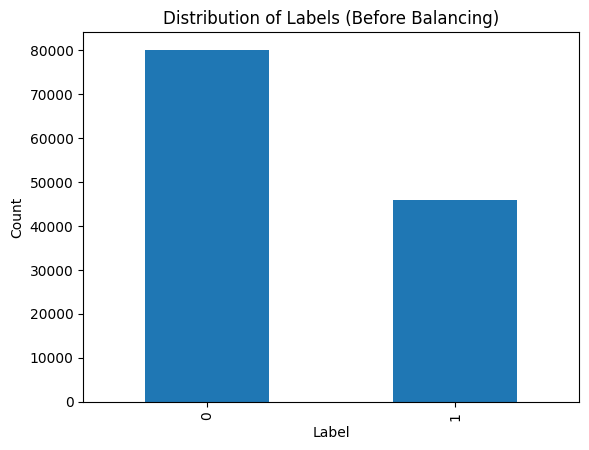

In [16]:
#before balancing the label
import matplotlib.pyplot as plt

# plot the distribution of the 'label' column before balancing
train['label'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (Before Balancing)')
plt.show()


In [90]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = train[train['label'] == 0]
df_minority = train[train['label'] == 1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=len(df_majority),    
                                 random_state=123)
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
train = df_upsampled

# Display new class counts
train['label'].value_counts()


0    80045
1    80045
Name: label, dtype: int64

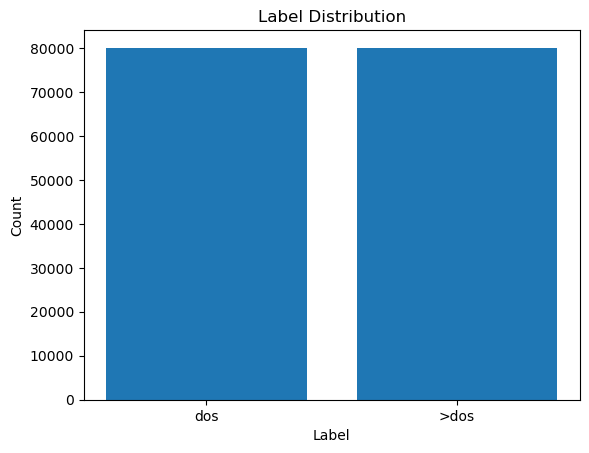

In [93]:
import matplotlib.pyplot as plt

# count the number of each label value in the balanced dataset
label_counts = train['label'].value_counts()

# plot a bar chart to show the label count
plt.bar(label_counts.index, label_counts.values)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['dos', '>dos'])
plt.show()




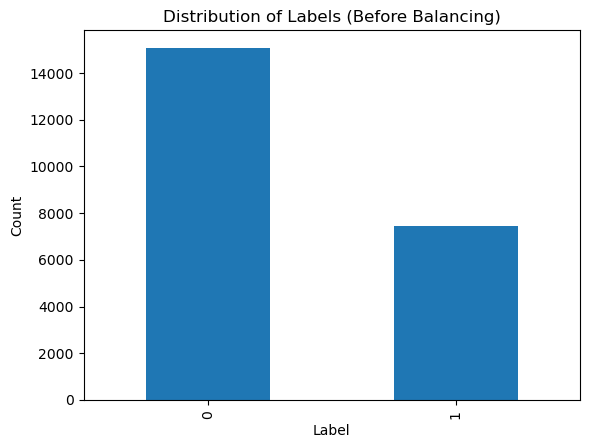

In [97]:
#balancing the test dataset
#before balancing the label
import matplotlib.pyplot as plt

# plot the distribution of the 'label' column before balancing
test['label'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (Before Balancing)')
plt.show()


In [98]:
#balancing the test dataset
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = test[test['label'] == 0]
df_minority = test[test['label'] == 1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=len(df_majority),    
                                 random_state=123)
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
test = df_upsampled

# Display new class counts
test['label'].value_counts()

0    15084
1    15084
Name: label, dtype: int64

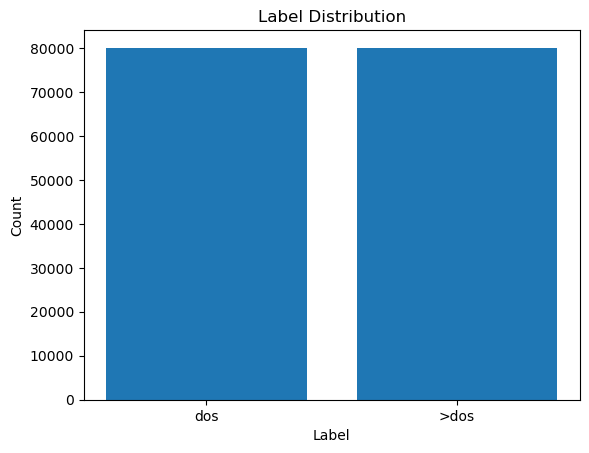

In [100]:
#balancing the test dataset
import matplotlib.pyplot as plt

# count the number of each label value in the balanced dataset
label_counts = train['label'].value_counts()

# plot a bar chart to show the label count
plt.bar(label_counts.index, label_counts.values)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['dos', '>dos'])
plt.show()


Separate features and label

In [107]:
y_train = train.iloc[:, -1]  # select the last column (label) as y_train
x_train = train.iloc[:, :-1]  # select all columns except the last one as x_train

y_test = test.iloc[:, -1]  # select the last column (label) as y_test
x_test = test.iloc[:, :-1]  # select all columns except the last one as x_test

print(x_train.shape)
print(y_train.shape)

print(x_train.head())
print(y_train.head())




(160090, 41)
(160090,)
    duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0          0              0       42     9        146          0     0   
2          0              1       21     9        232       8153     0   
3          0              1       21     9        199        420     0   
11         0              1       21     9        287       2251     0   
12         0              1       17     9        334          0     0   

    wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
0                0       0    0  ...             255                   1   
2                0       0    0  ...              30                 255   
3                0       0    0  ...             255                 255   
11               0       0    0  ...               8                 219   
12               0       0    0  ...               2                  20   

    dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    

# training the model
Train data with one or more chosen classification algorithms (DecisionTrees, SVM, KNN, Naive bayes, Logistic regression ...)

Check training accuracy and report

In [109]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy)
report = classification_report(y_test, prediction)
print("Classification report:\n", report)

Accuracy: 0.9069875364624768
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91     15084
           1       0.98      0.83      0.90     15084

    accuracy                           0.91     30168
   macro avg       0.92      0.91      0.91     30168
weighted avg       0.92      0.91      0.91     30168



In [112]:
final_prediction = model_fit.predict(x_test)

Upload the test result

In [113]:
df = pd.DataFrame(final_prediction, columns=['label'])

In [115]:
df.to_excel('2CS.xlsx', index=False) # name the file with your teamname in place of $

Confusion Matrix Graph

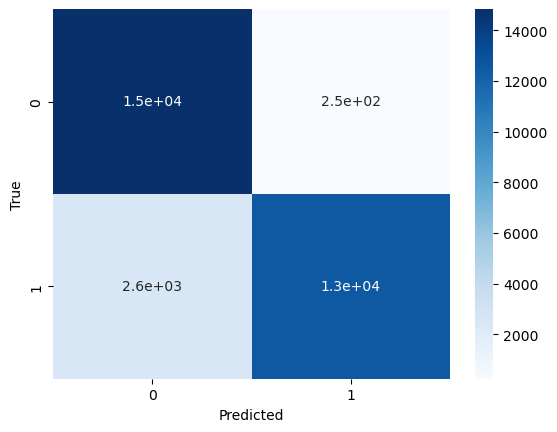

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     15084
           1       0.98      0.83      0.90     15084

    accuracy                           0.91     30168
   macro avg       0.92      0.91      0.91     30168
weighted avg       0.92      0.91      0.91     30168



In [123]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# plot the confusion matrix
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# print the classification report
cr = classification_report(y_test, prediction)
print(cr)



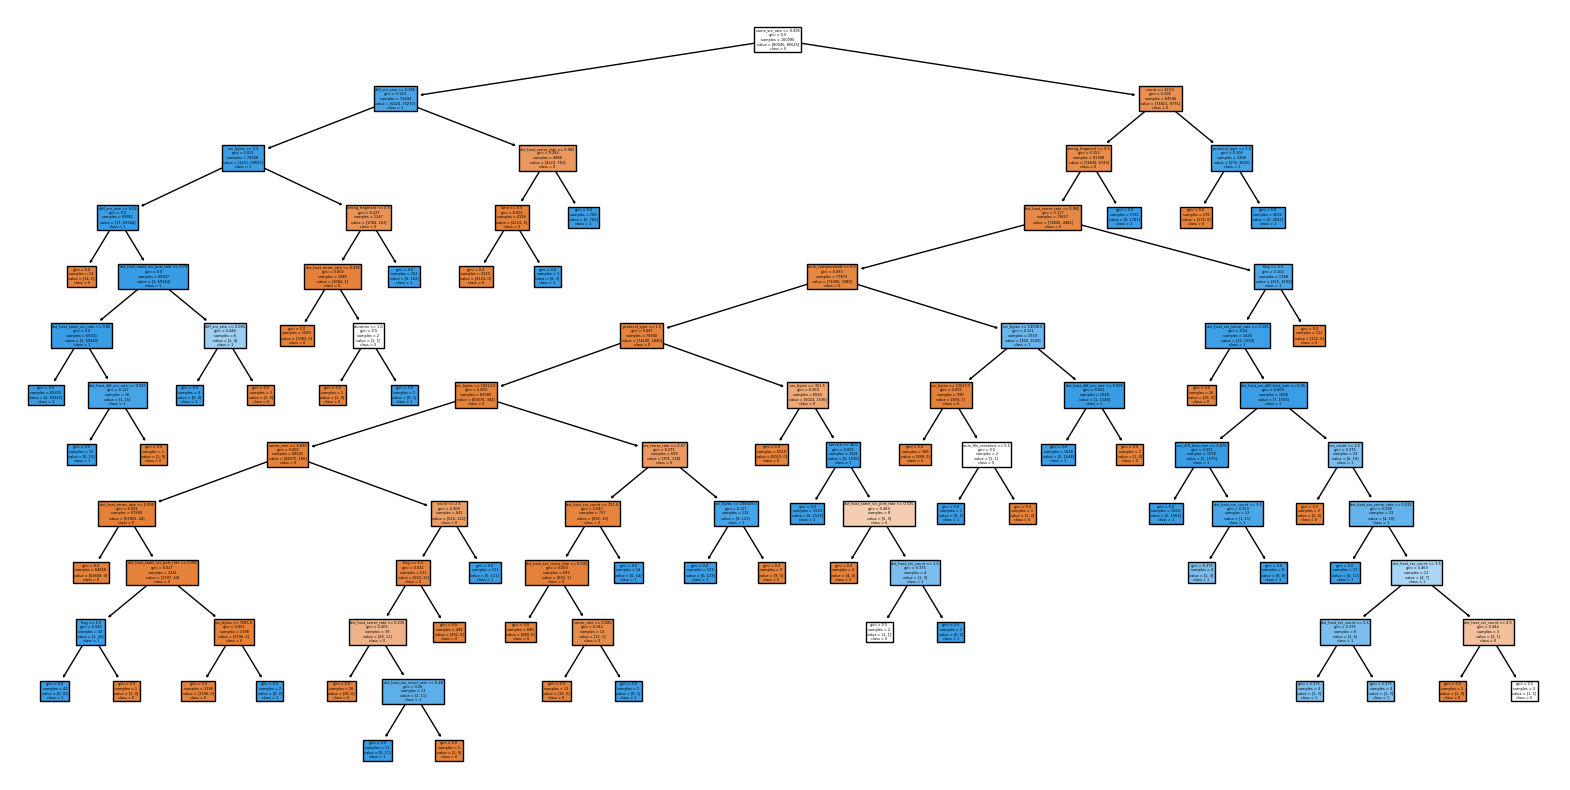

In [125]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model_fit, feature_names=x_train.columns, class_names=['0','1'], filled=True)
plt.show()


In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
# Fit the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate the model
acc_score = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy score: ", acc_score)
print("Confusion matrix: \n", conf_mat)

Accuracy score:  0.8762264651286131
Confusion matrix: 
 [[14852   232]
 [ 3502 11582]]


In [ ]:
Confusion Matrix Graph

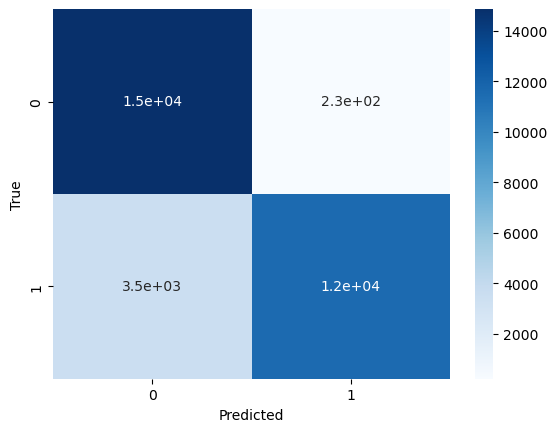

              precision    recall  f1-score   support

           0       0.81      0.98      0.89     15084
           1       0.98      0.77      0.86     15084

    accuracy                           0.88     30168
   macro avg       0.89      0.88      0.87     30168
weighted avg       0.89      0.88      0.87     30168



In [129]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# print the classification report
cr = classification_report(y_test, y_pred)
print(cr)

comparing the two algorithms

In [130]:
# Print the accuracy of each model
print(f'Decision tree accuracy: {accuracy}')
print(f'Random forest accuracy: {acc_score}')



Decision tree accuracy: 0.9069875364624768
Random forest accuracy: 0.8762264651286131


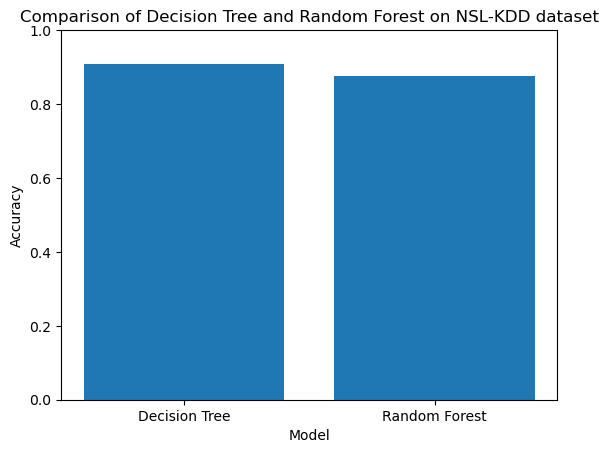

In [131]:
# Plot the comparison graph
import matplotlib.pyplot as plt

models = ['Decision Tree', 'Random Forest']
accuracies = [accuracy, acc_score]

plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.title('Comparison of Decision Tree and Random Forest on NSL-KDD dataset')
plt.show()

 ROC curve

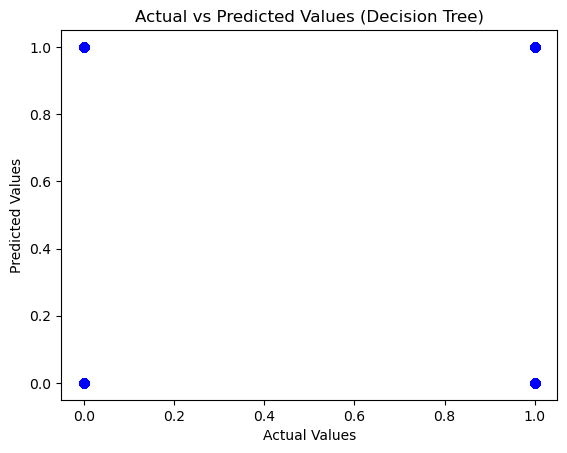

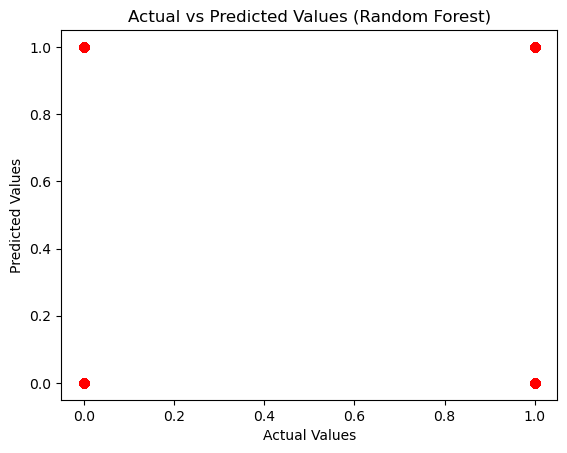

In [133]:
import matplotlib.pyplot as plt

# Plot the scatter plot for actual vs predicted values for Decision Tree
plt.scatter(y_test, prediction, color='blue')
plt.title('Actual vs Predicted Values (Decision Tree)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Plot the scatter plot for actual vs predicted values for Random Forest
plt.scatter(y_test, y_pred, color='red')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

